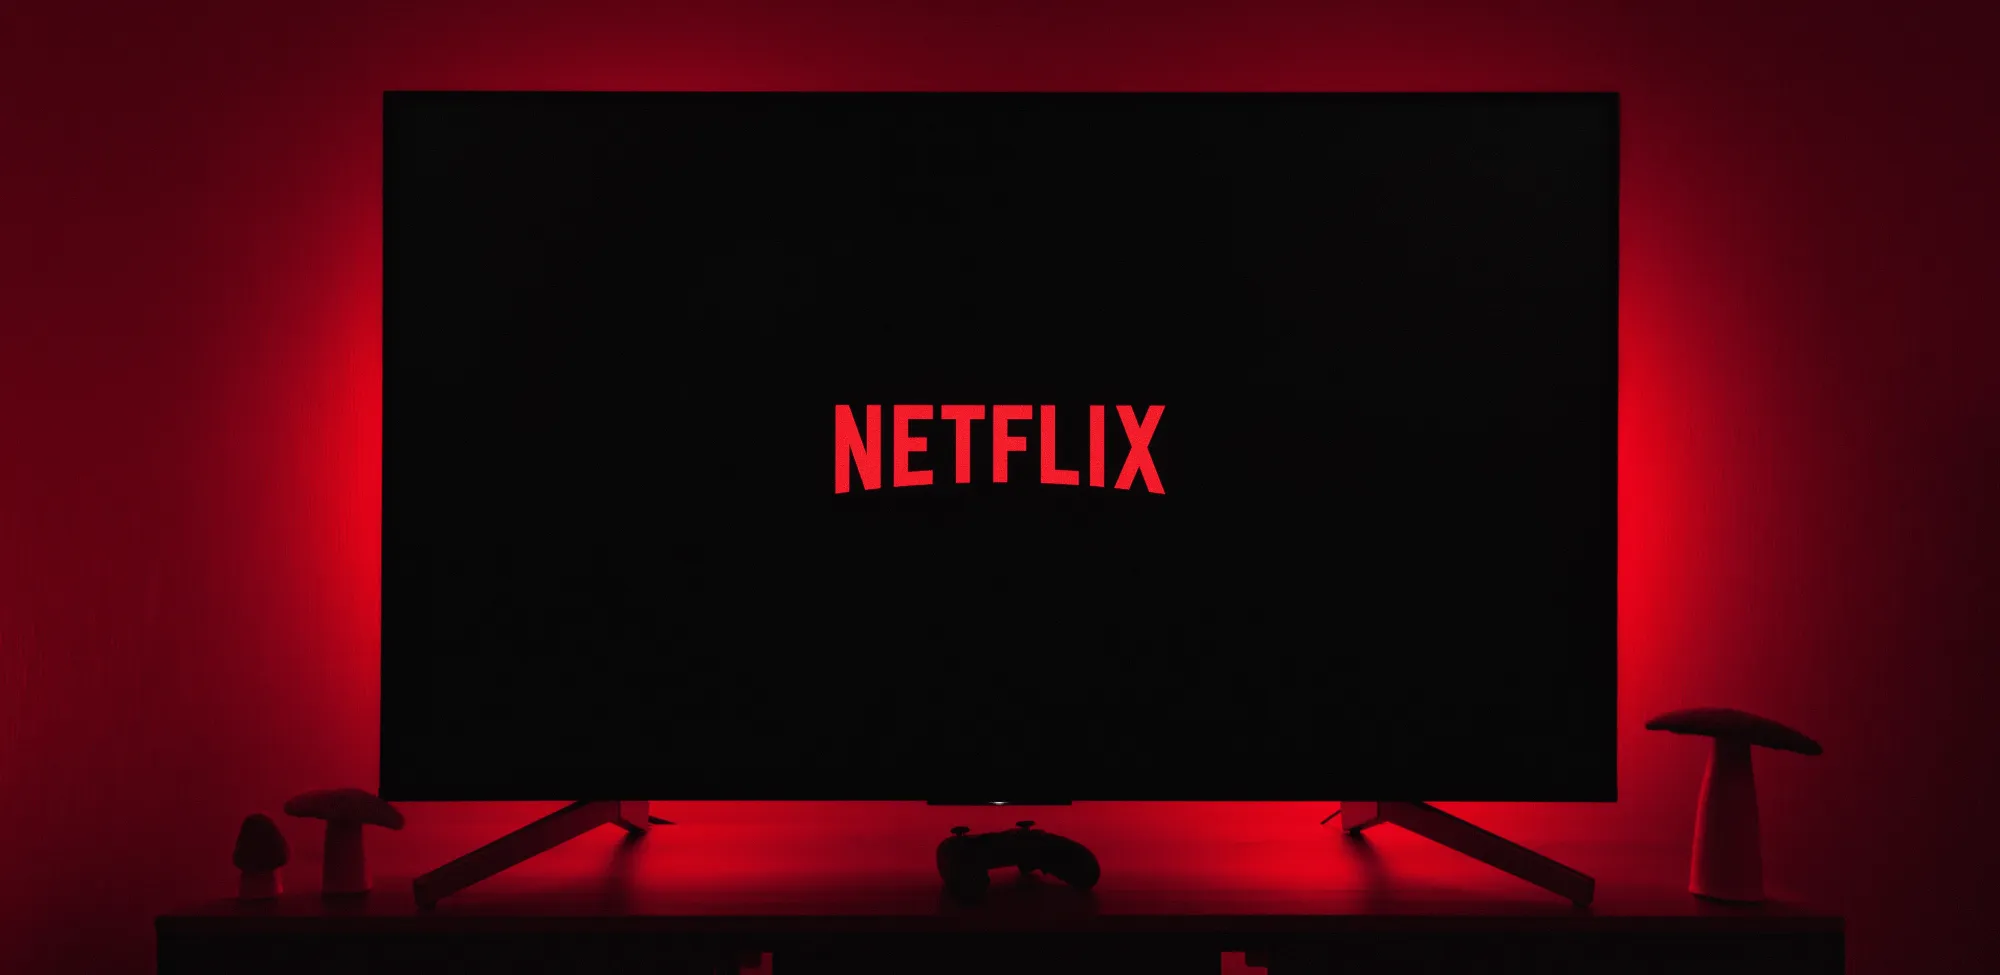

**IMPORTING THE LIBRARIES, UPLOADING THE DATA & CLEANSING THE DATA**

**BUSINESS PROBLEM**:Analyzing the Netflix data and generating insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

**IMPORTING THE LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**UPLOADING THE DATA**

In [6]:
df=pd.read_csv("netflix.csv")

**EXPLORING THE DATA**

In [7]:
#Checking shape of the data: Here we found that there are 8807 nos of rows & 12 nos of columns
df.shape


(8807, 12)

In [8]:
# Checking the data types: Here we can notice that all data types are ok except the column "date_added". It should be in datetime format , we will see it later.
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [9]:
#Checking the unique values : Earlier we have seen that we have 8807 nos of rows, & here we can observe many of the columns having uniques values less than 8807,
# so might be they contain null values or having data duplicacy.We will see it in the upcoming parts.
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Checking the output carefully we can observe that the columns- "director","cast","country","listed_in"--- some cases there are
# multiple values listed in same line, so we need to create seperate line for them
# for the benifit of our analysis.
[print(df[i].value_counts(),"\n","NEXT_COLUMN") for i in df.columns]

show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64 
 NEXT_COLUMN
type
Movie      6131
TV Show    2676
Name: count, dtype: int64 
 NEXT_COLUMN
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64 
 NEXT_COLUMN
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
             

[None, None, None, None, None, None, None, None, None, None, None, None]

In [12]:
#Un-nesting the columns("director","cast","country","listed_in") & also trimming the leading & trailing space & making all values in
# lower case to avoid data duplicacy
for i in df[["director","cast","country","listed_in"]]:
  df[i]=df[i].str.split(",")
  df=df.explode(i)
  df[i]=df[i].str.strip()
  df[i]=df[i].str.lower()


In [13]:
# From the below ouput we can notice that all the values for the upper mentioned column
# which are coming in same line now coming into seperate line
[print(df[i].value_counts(),"\n","NEXT_COLUMN") for i in df.columns]

show_id
s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: count, Length: 8807, dtype: int64 
 NEXT_COLUMN
type
Movie      145917
TV Show     56148
Name: count, dtype: int64 
 NEXT_COLUMN
title
Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: count, Length: 8807, dtype: int64 
 NEXT_COLUMN
director
martin scorsese        419
youssef chahine        409
cathy garcia-molina    356
steven spielberg       355
lars von trier         336
                      ... 
jacob lamendola          1
matt tyrnauer            1
richard ladkani          1
peter nicks      

[None, None, None, None, None, None, None, None, None, None, None, None]

**CLEANSING THE DATA : Handling Null Values**

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


In [15]:
# Checkin null values(in percentage to the whole data of the particular column):
# From this below output we notice there are 25.06% in director column,1.06% in "cast"column,5.88% in "country" column, date_added-.07%,rating-.03%,duration-.001%
# null values present in our data. So we need to perform some data cleaning.
(df.isna().sum()/len(df))*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,25.062727
cast,1.063519
country,5.887709
date_added,0.078193
release_year,0.000000
rating,0.033158
duration,0.001485


In [16]:
# From this data we notice some data impurity in "rating" column like-"74min","84min","66min --these values should not be in "rating column"
df["rating"].value_counts()

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [17]:
#Comparing the rating & duration column it is observed that In duration column, there are three unexpected values("74min","84min","66min")
# present in "rating" column which should be in "duration" column.Thatswhy the "duration" column contaning null values for the corresponding
# "rating" values.
df[df["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,louis c.k.,louis c.k.,united states,"April 4, 2017",2017,74 min,NaN,movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,louis c.k.,louis c.k.,united states,"September 16, 2016",2010,84 min,NaN,movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,louis c.k.,louis c.k.,united states,"August 15, 2016",2015,66 min,NaN,movies,The comic puts his trademark hilarious/thought...


In [18]:
df[df["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,louis c.k.,louis c.k.,united states,"April 4, 2017",2017,74 min,NaN,movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,louis c.k.,louis c.k.,united states,"September 16, 2016",2010,84 min,NaN,movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,louis c.k.,louis c.k.,united states,"August 15, 2016",2015,66 min,NaN,movies,The comic puts his trademark hilarious/thought...


In [19]:
# Replacing the "duration" column null values with corresponding values in "rating" column
df["duration"]=df["duration"].fillna(df["rating"].loc[df["duration"].isnull()])
df["duration"].isnull().sum()

0

In [20]:
# Replacing the "rating" column unexpected values("74 min","84 min","66 min") & null values with "No Rating"
df["rating"]=df["rating"].apply(lambda x: "No_Rating" if "min" in str(x).lower() else x)

In [21]:
df['rating'].fillna('No_Rating',inplace=True)

In [22]:
df["rating"].value_counts()

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [23]:
df["rating"].isnull().sum()

0

In [24]:
#  We have replaced all the null values in "date_added" column with the corresponding "release year" with its most frequent "date_added" values
for i in df[df['date_added'].isnull()]["release_year"].unique():
  new=df[df['release_year']==i]['date_added'].mode().values[0]
  df.loc[df['release_year']==i,'date_added']=df.loc[df['release_year']==i,'date_added'].fillna(new)


df["date_added"].isnull().sum()

0

In [25]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,0
release_year,0
rating,0
duration,0


In [26]:
# Handling missing values in "country" column : While exploring our data we found that there are some missing values in
# "country" column, so we have replaced them with the most frequest countries of the corresponding directors but
# still we have some cases where the corresponding value in director column is also null so we will replace them with
# most frequesnt countries of cast & remaing will be replaced by "Unknown Country" ----------------------

for i in df[(df["country"].isnull()) & (~df["director"].isnull())]["director"].unique():
  if i in df[~df['country'].isnull()]['director'].unique():
    now=df[(df["director"]==i)]["country"].mode()[0]
    df.loc[df["director"]==i,"country"]=df.loc[df["director"]==i,"country"].fillna(now)

df["country"].isnull().sum()

9203

In [27]:

for i in df[(df["country"].isnull()) & (~df["cast"].isnull())]["cast"].unique():
  if i in df[~df['country'].isnull()]['cast'].unique():
    now1=df[(df["cast"]==i)]["country"].mode()[0]
    df.loc[df["cast"]==i,"country"]=df.loc[df["cast"]==i,"country"].fillna(now1)


df["country"].isnull().sum()

5021

In [28]:
df['country'].fillna('Unknown Country',inplace=True)
df["country"].isnull().sum()

0

In [29]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,0
date_added,0
release_year,0
rating,0
duration,0


In [30]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,kirsten johnson,NaN,united states,"September 25, 2021",2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,ama qamata,south africa,"September 24, 2021",2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t..."


In [31]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,0
date_added,0
release_year,0
rating,0
duration,0


In [32]:
# For the benificial of our query we have created a deep copy .
dy=df.copy()

In [33]:
# Replacing missing values from director column with the most frequent directors of corresponding 'country','type','listed_in','cast'
# & for the rest cases(when all having null) then replace with 'Unknown Director'

# For the cases(when all having null) then replace with 'Unknown Director'
dy.loc[dy['cast'].isnull() & (dy['country'].eq('Unknown Country')) & dy["director"].isnull(),["director"]]="Unknown Director"

# For the cases(when cast having null) then replace with the most frequent directors of corresponding 'country','type','listed_in'.
mask_cast_null = dy['cast'].isnull() & (~dy['country'].eq('Unknown Country')) & dy['director'].isnull()

dy.loc[mask_cast_null, 'director'] = (
    dy[mask_cast_null]
    .groupby(['country', 'type', 'listed_in'])['director']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Director"))


# For the cases(when country is Unknown) then replace with the most frequent directors of corresponding 'type','listed_in','cast'.
mask_country_unknown = (~dy['cast'].isnull()) & (dy['country'].eq('Unknown Country')) & dy['director'].isnull()

dy.loc[mask_country_unknown, 'director'] = (
    dy[mask_country_unknown]
    .groupby(['type','listed_in','cast'])['director']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Director"))

#Replacing missing values from director column with the most frequent directors of corresponding 'country','type','listed_in','cast'
#(when all dont contain null values)

mask_all_known = (~dy['cast'].isnull()) & (~dy['country'].eq('Unknown Country')) & dy['director'].isnull()
dy.loc[mask_all_known, 'director'] = (
    dy[mask_all_known]
    .groupby(['country','type','listed_in','cast'])['director']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Director"))


In [34]:
# Now there is no missing value in "director" column.
dy["director"].isnull().sum()

0

In [35]:
# Replacing missing values from "cast" column with the most frequent casts of corresponding 'country','type','listed_in','director'
# & for the rest cases(when all having null/unknown) then replace with 'Unknown Cast'

# For the cases(when all unknown) then replace with 'Unknown Cast'
dy.loc[(dy['country'].eq('Unknown Country')) & (dy['director'].eq('Unknown Director')) & (dy['cast'].isnull()),["cast"]]="Unknown Cast"

# Replacing missing values from "cast" column with the most frequent casts of corresponding 'country','type','listed_in','director'
#(when all are known)
mask_all_known = (~dy['country'].eq('Unknown Country')) & (~dy['director'].eq('Unknown Director')) & dy['cast'].isnull()

dy.loc[mask_all_known,'cast'] = (
    dy[mask_all_known]
    .groupby(['country','type','listed_in','director'])['cast']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Cast"))


# For the cases(when director is Unknown) then replace with the most frequent casts of corresponding 'country','type','listed_in'.
mask_director_unknown = (~dy['country'].eq('Unknown Country')) & (dy['director'].eq('Unknown Director')) & dy['cast'].isnull()

dy.loc[mask_director_unknown, 'cast'] = (
    dy[mask_director_unknown]
    .groupby(['country','type','listed_in'])['cast']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Cast"))

# For the cases(when country is Unknown) then replace with the most frequent casts of corresponding 'type','listed_in','director'

mask_country_unknown = (dy['country'].eq('Unknown Country')) & (~dy['director'].eq('Unknown Director')) & dy['cast'].isnull()
dy.loc[mask_country_unknown, 'cast'] = (
    dy[mask_country_unknown]
    .groupby(['type','listed_in','director'])['cast']
    .transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Cast"))


In [36]:
## Now there is no missing value in "cast" column.
dy["cast"].isnull().sum()

0

In [37]:
# So we have succesfully replaced all the missing values.
dy.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**DISTRIBUTION OF CONTENT TYPES**

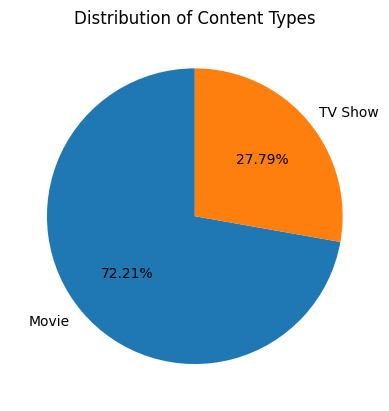

In [38]:
# Content Type Distribution : From this below chart it is been observed that there are 72.21% movies present in Netflix where 27.79% TV SHows
# are in Netflix.
type_label=dy["type"].value_counts(normalize=True)*100
plt.pie(type_label,labels=type_label.index,startangle=90,explode=[0,0],autopct="%.2f%%")
plt.title('Distribution of Content Types')
plt.show()

In [39]:
# For analyzing sepearately we have created movies & Tv shows seperately.
movies  = dy.loc[dy['type'] == 'Movie']
tv_shows = dy.loc[dy['type'] == 'TV Show']

**ANALYZING DURATION**

In [40]:
# Exploring the duration : From below output it can be observed that it will be difficult to perform
# any analysis as movie duration contain "min" & tv_show duration contain "seasons" , we need to remove these.
print("movies_duration :", movies.duration.values)
print("tv_shows duration :", tv_shows.duration.values)

movies_duration : ['90 min' '91 min' '91 min' ... '111 min' '111 min' '111 min']
tv_shows duration : ['2 Seasons' '2 Seasons' '2 Seasons' ... '2 Seasons' '2 Seasons'
 '2 Seasons']


In [41]:
movies['duration']=movies['duration'].str.replace(" min","")
movies['duration']=movies['duration'].astype(float)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

<ipython-input-41-22fd76db67c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace(" min","")
<ipython-input-41-22fd76db67c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(float)
<ipython-input-41-22fd76db67c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [42]:
movies["duration_in_minutes"].value_counts()

,count
duration_in_minutes,
94.0,4343
106.0,4040
97.0,3624
95.0,3560
96.0,3511
...,...
20.0,4
5.0,3
9.0,2


In [43]:
print(movies["duration_in_minutes"].min())
print(movies["duration_in_minutes"].max())

3.0
312.0


In [44]:
bins1 = [1,50,80,100,120,150,200,315]
labels1 = ['1-50','50-80','80-100','100-120','120-150','150-200','200-312']
movies['duration_range'] = pd.cut(movies['duration_in_minutes'],bins=bins1,labels=labels1)
movies.reset_index(drop=True).head()

<ipython-input-44-7e42ebb34a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_range'] = pd.cut(movies['duration_in_minutes'],bins=bins1,labels=labels1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_minutes,listed_in,description,duration_range
0,s1,Movie,Dick Johnson Is Dead,kirsten johnson,Unknown Cast,united states,"September 25, 2021",2020,PG-13,90.0,documentaries,"As her father nears the end of his life, filmm...",80-100
1,s7,Movie,My Little Pony: A New Generation,robert cullen,vanessa hudgens,united states,"September 24, 2021",2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100
2,s7,Movie,My Little Pony: A New Generation,robert cullen,kimiko glenn,united states,"September 24, 2021",2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100
3,s7,Movie,My Little Pony: A New Generation,robert cullen,james marsden,united states,"September 24, 2021",2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100
4,s7,Movie,My Little Pony: A New Generation,robert cullen,sofia carson,united states,"September 24, 2021",2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100


In [45]:
# From the output it can be inferred that mostly movies fall in the duration range between 80-120 mins & then 120-150 mins.
movies["duration_range"].value_counts()

,count
duration_range,
80-100,52992
100-120,48724
120-150,26691
50-80,7701
150-200,6737
1-50,2548
200-312,524


<Axes: xlabel='duration_range', ylabel='Count'>

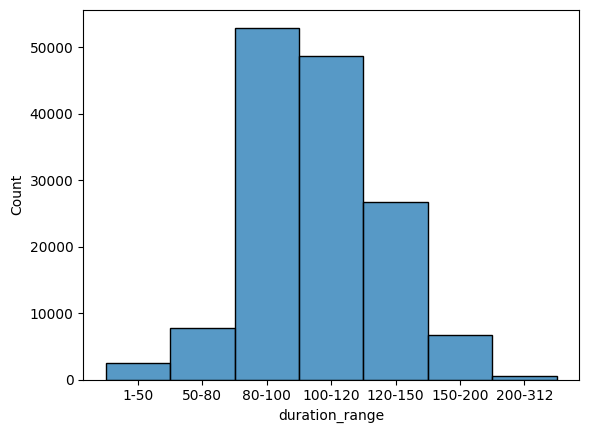

In [46]:
sns.histplot(data=movies["duration_range"])

In [47]:
dy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [48]:
tv_shows.duration.values

array(['2 Seasons', '2 Seasons', '2 Seasons', ..., '2 Seasons',
       '2 Seasons', '2 Seasons'], dtype=object)

In [49]:
tv_shows['duration']=tv_shows['duration'].str.replace(" Seasons","")
tv_shows['duration']=tv_shows['duration'].str.replace(" Season","")
tv_shows['duration']=tv_shows['duration'].astype(int)
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)

<ipython-input-49-a80fce2bf747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration']=tv_shows['duration'].str.replace(" Seasons","")
<ipython-input-49-a80fce2bf747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration']=tv_shows['duration'].str.replace(" Season","")
<ipython-input-49-a80fce2bf747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [50]:
# From the following output it can be inferred that most of the tv_shows having only 1 season.
tv_shows.duration_in_seasons.value_counts()

,count
duration_in_seasons,
1,35035
2,9559
3,5084
4,2134
5,1698
7,843
6,633
8,286
9,257


<Axes: xlabel='duration_in_seasons', ylabel='Count'>

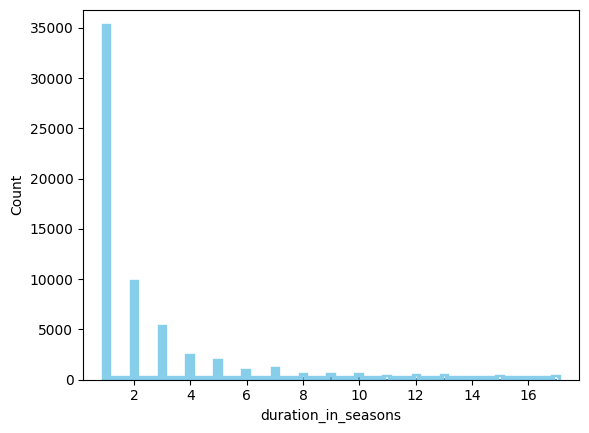

In [51]:
sns.histplot(data=tv_shows["duration_in_seasons"],linewidth=6,edgecolor="skyblue")

In [52]:
dy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**ANALYZING THE DATE_ADDED & RELEASE YEAR**

** MOVIES**

In [53]:
movies_release_year=movies.groupby("release_year")["title"].count().sort_values().reset_index()

In [54]:
tv_shows=tv_shows.copy()

In [55]:
tvshows_release_year=tv_shows.groupby("release_year")["title"].count().sort_values().reset_index()

<Axes: xlabel='release_year', ylabel='title'>

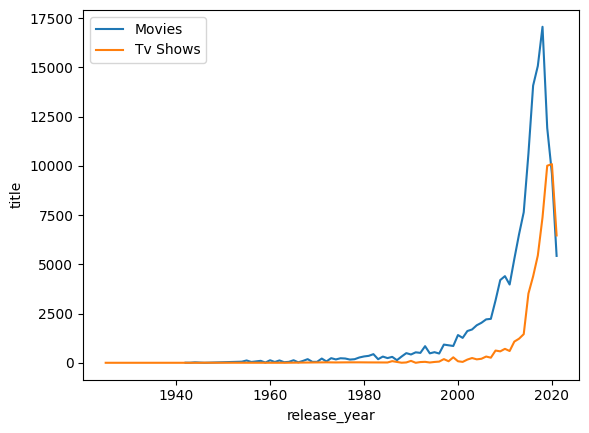

In [56]:
# MOVIES : From this output we can infer that netflix increase to add the movies which released after 2010 significantly on their platform
# but on the other hand ther is a sharp decline after 2019, it may be due to covid as producing of movies also stopped for covid.
# TV SHOWS : From this output we can infer that netflix increase to add the tv shows which released after 2010 significantly on their platform
# but on the other hand ther is a sharp decline after 2019, it may be due to covid as producing of movies also stopped for covid.
sns.lineplot(x="release_year",y="title",data=movies_release_year,label="Movies")
sns.lineplot(x="release_year",y="title",data=tvshows_release_year,label="Tv Shows")

**ANALYZING DATE_ADDED**

In [57]:
# From the output it is observed that the data type is "object" which need to be converted into datetime format.
movies["date_added"].info()

<class 'pandas.core.series.Series'>
Index: 145917 entries, 0 to 8806
Series name: date_added
Non-Null Count   Dtype 
--------------   ----- 
145917 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [58]:
# So here we have converted the "date_added" column into datetime format to better access the year,month,date etc for our analysis.
movies["date_added"]=pd.to_datetime(movies["date_added"])
movies["date_added"].info()

<class 'pandas.core.series.Series'>
Index: 145917 entries, 0 to 8806
Series name: date_added
Non-Null Count   Dtype         
--------------   -----         
145917 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB


<ipython-input-58-35fe7806d35e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["date_added"]=pd.to_datetime(movies["date_added"])


In [59]:
tv_shows["date_added"]=tv_shows["date_added"].str.strip()

In [60]:
tv_shows["date_added"]=pd.to_datetime(tv_shows["date_added"])
tv_shows["date_added"].info()

<class 'pandas.core.series.Series'>
Index: 56148 entries, 1 to 8803
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
56148 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 877.3 KB


In [61]:
# Unpacking the "date_added" column into seperate year,month & day column.
movies=movies.copy()
movies["year_added"]=movies["date_added"].dt.year
movies["month_added"]=movies["date_added"].dt.month
movies['week_of_month'] = movies['date_added'].dt.day.apply(lambda x: (x - 1) // 7 + 1)
movies["weekday_added"]=movies["date_added"].dt.strftime("%A")
movies.reset_index(drop=True).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_minutes,listed_in,description,duration_range,year_added,month_added,week_of_month,weekday_added
0,s1,Movie,Dick Johnson Is Dead,kirsten johnson,Unknown Cast,united states,2021-09-25,2020,PG-13,90.0,documentaries,"As her father nears the end of his life, filmm...",80-100,2021,9,4,Saturday
1,s7,Movie,My Little Pony: A New Generation,robert cullen,vanessa hudgens,united states,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100,2021,9,4,Friday
2,s7,Movie,My Little Pony: A New Generation,robert cullen,kimiko glenn,united states,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100,2021,9,4,Friday
3,s7,Movie,My Little Pony: A New Generation,robert cullen,james marsden,united states,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100,2021,9,4,Friday
4,s7,Movie,My Little Pony: A New Generation,robert cullen,sofia carson,united states,2021-09-24,2021,PG,91.0,children & family movies,Equestria's divided. But a bright-eyed hero be...,80-100,2021,9,4,Friday


In [62]:
# Unpacking the "date_added" column into seperate year,month & day column.
tv_shows["year_added"]=tv_shows["date_added"].dt.year
tv_shows["month_added"]=tv_shows["date_added"].dt.month
tv_shows['week_of_month'] = tv_shows['date_added'].dt.day.apply(lambda x: (x - 1) // 7 + 1)
tv_shows["weekday_added"]=tv_shows["date_added"].dt.strftime("%A")
tv_shows.reset_index(drop=True).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_seasons,listed_in,description,year_added,month_added,week_of_month,weekday_added
0,s2,TV Show,Blood & Water,Unknown Director,ama qamata,south africa,2021-09-24,2021,TV-MA,2,international tv shows,"After crossing paths at a party, a Cape Town t...",2021,9,4,Friday
1,s2,TV Show,Blood & Water,Unknown Director,ama qamata,south africa,2021-09-24,2021,TV-MA,2,tv dramas,"After crossing paths at a party, a Cape Town t...",2021,9,4,Friday
2,s2,TV Show,Blood & Water,Unknown Director,ama qamata,south africa,2021-09-24,2021,TV-MA,2,tv mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,4,Friday
3,s2,TV Show,Blood & Water,Unknown Director,khosi ngema,south africa,2021-09-24,2021,TV-MA,2,international tv shows,"After crossing paths at a party, a Cape Town t...",2021,9,4,Friday
4,s2,TV Show,Blood & Water,Unknown Director,khosi ngema,south africa,2021-09-24,2021,TV-MA,2,tv dramas,"After crossing paths at a party, a Cape Town t...",2021,9,4,Friday


Text(0.5, 1.0, 'Trend of Movies & TV Shows Added Year Wise')

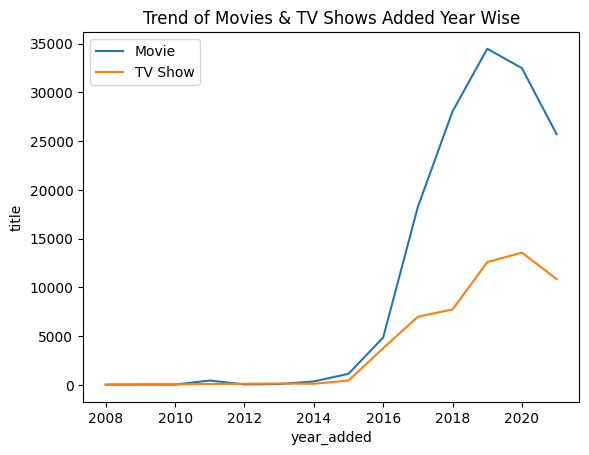

In [63]:
# MOVIES : Here it can be stated that there is a significant increasing trend in adding the movie from 2016 to 2019 but after 2019
#          it is declining due to the reason of covid.
#TV Shows: Here it can be stated that there is a significant increasing trend in adding the tv shows from 2015 to 2019 but after 2019
#          it is declining due to the reason of covid.
movies_added_per_year=movies.groupby("year_added")["title"].count().sort_values().reset_index()
tvshows_added_per_year=tv_shows.groupby("year_added")["title"].count().sort_values().reset_index()
sns.lineplot(x="year_added",y="title",data=movies_added_per_year,label="Movie")
sns.lineplot(x="year_added",y="title",data=tvshows_added_per_year,label="TV Show")
plt.title("Trend of Movies & TV Shows Added Year Wise")


Text(0.5, 1.0, 'Trend of Movies & TV Shows Added Month Wise')

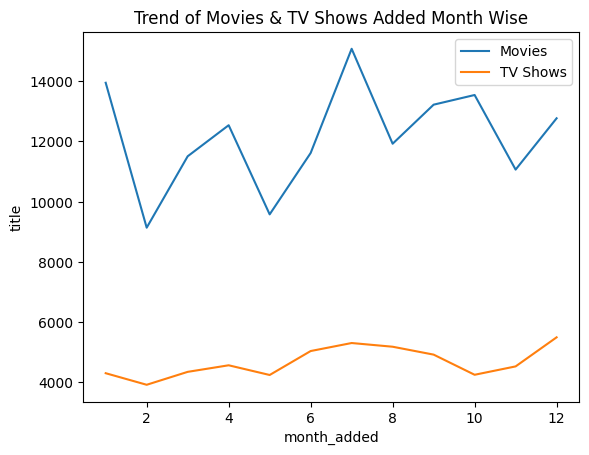

In [64]:
# MOVIES : Here is a cyclic pattern can be observed here & most of the movies added in january ,april,july,october ,december due to some festival,new year etc.
# TV SHOWS: Here is a cyclic pattern can be observed here & most of the tv shows added in january ,april,july,december due to some festival,new year etc.
movies_added_per_month=movies.groupby("month_added")["title"].count().sort_values().reset_index()
tvshows_added_per_month=tv_shows.groupby("month_added")["title"].count().sort_values().reset_index()
sns.lineplot(x="month_added",y="title",data=movies_added_per_month,label="Movies")
sns.lineplot(x="month_added",y="title",data=tvshows_added_per_month,label="TV Shows")
plt.title("Trend of Movies & TV Shows Added Month Wise")

Text(0.5, 1.0, 'Trend of Movies & TV Shows Added Weekofmonth Wise')

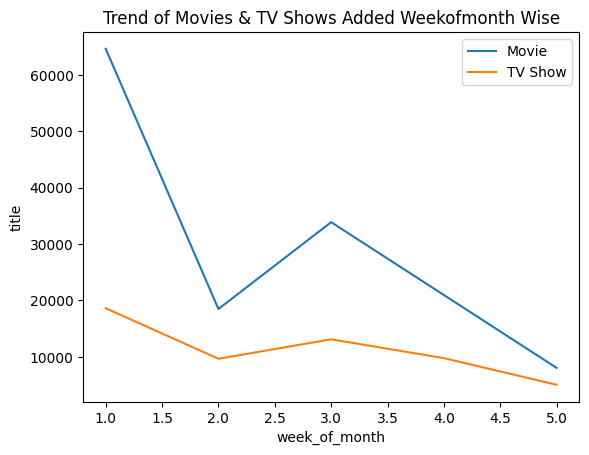

In [65]:
# MOVIES : From here we can say that most of the movies have been added at 1st & 3rd week.
# TV SHOWS : # From here we can say that most of the TV Shows have been added at 1st & 3rd week.
movies_added_per_weekofmonth=movies.groupby("week_of_month")["title"].count().sort_values().reset_index()
tvshows_added_per_weekofmonth=tv_shows.groupby("week_of_month")["title"].count().sort_values().reset_index()
sns.lineplot(x="week_of_month",y="title",data=movies_added_per_weekofmonth,label="Movie")
sns.lineplot(x="week_of_month",y="title",data=tvshows_added_per_weekofmonth,label="TV Show")
plt.title("Trend of Movies & TV Shows Added Weekofmonth Wise")

In [66]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'weekday_added' to a categorical type with the specified order
movies["weekday_added"] = pd.Categorical(movies["weekday_added"], categories=day_order, ordered=True)
tv_shows["weekday_added"] = pd.Categorical(tv_shows["weekday_added"], categories=day_order, ordered=True)

<ipython-input-67-fd9dc3ca8b5d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movies_added_per_weekday=movies.groupby("weekday_added")["title"].count().sort_values().reset_index()
<ipython-input-67-fd9dc3ca8b5d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tvshows_added_per_weekday=tv_shows.groupby("weekday_added")["title"].count().sort_values().reset_index()


Text(0.5, 1.0, 'Trend of Movies Added Weekday Wise')

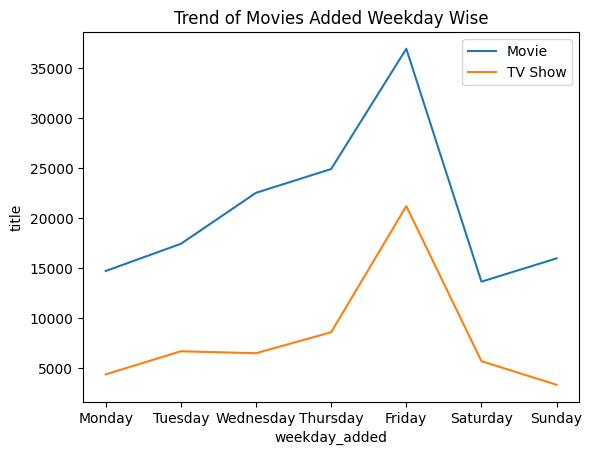

In [67]:
# MOVIES : From this chart it can be noticed that most of the movies added on Friday as it is just before of weekend.
# TV SHOWS : From this chart it can be noticed that most of the tv shows added on Friday as it is just before of weekend.
movies_added_per_weekday=movies.groupby("weekday_added")["title"].count().sort_values().reset_index()
tvshows_added_per_weekday=tv_shows.groupby("weekday_added")["title"].count().sort_values().reset_index()
sns.lineplot(x="weekday_added",y="title",data=movies_added_per_weekday,label="Movie")
sns.lineplot(x="weekday_added",y="title",data=tvshows_added_per_weekday,label="TV Show")
plt.title("Trend of Movies Added Weekday Wise")

**Content Analysis by Genre and Type**

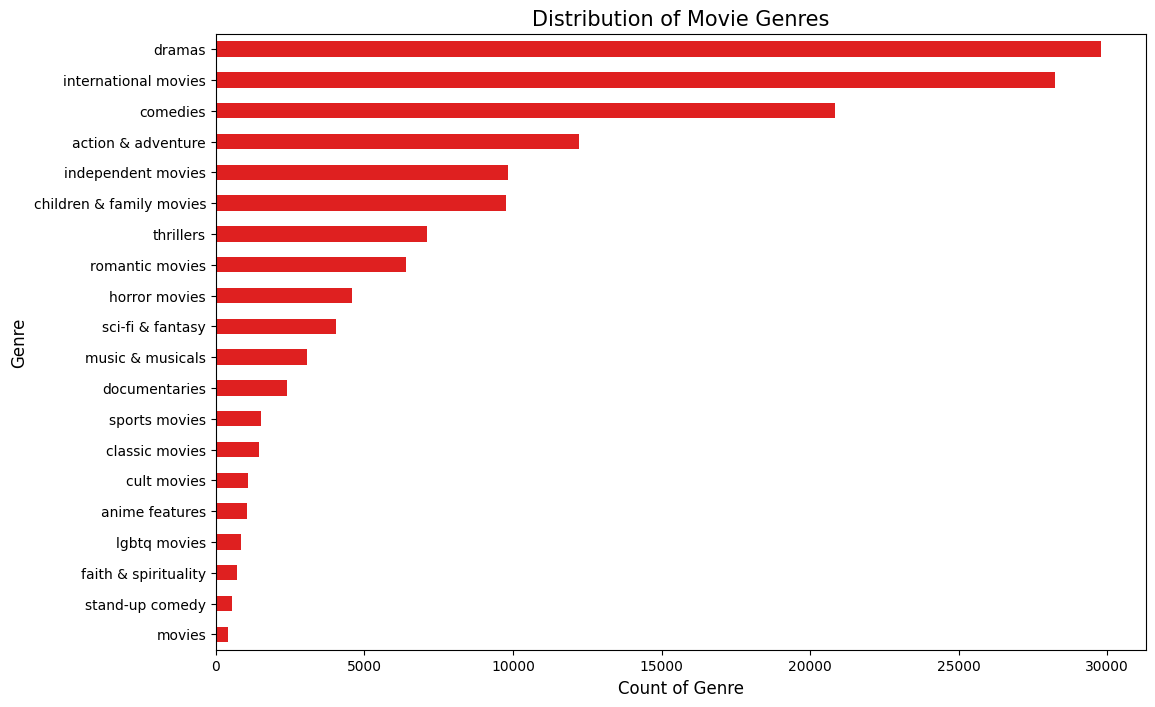

In [68]:
# Distribution Of Movie Genres : Here we can conclude that most of the movies come under the
# [dramas,international movies,comedies,action & adventure,independent movies] --These are the top5 movies genre.
movies_topgenre=movies["listed_in"].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.title("Distribution of Movie Genres",fontsize=15)
plt.xlabel("Count of Genre",fontsize=12)
plt.ylabel("Genre",fontsize=12)
sns.barplot(data=movies_topgenre, y="listed_in", x="count",width=.5,color="red")
plt.show()


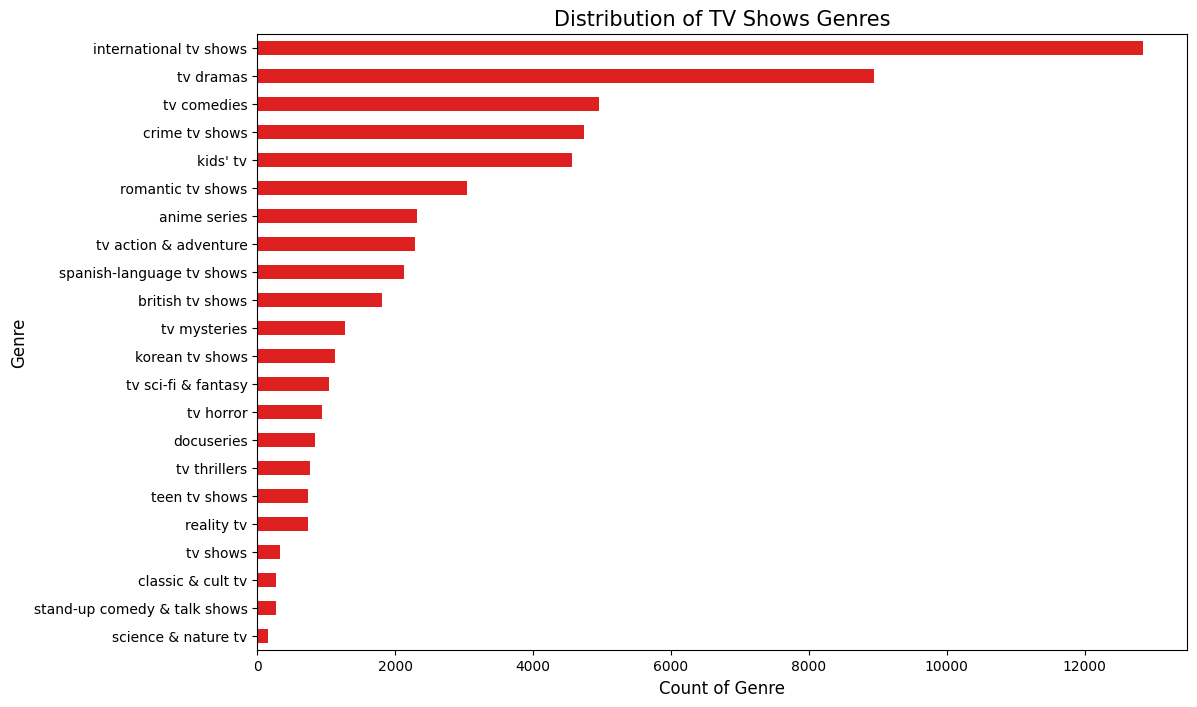

In [69]:
# Distribution Of TV Shows Genres : Here we can conclude that most of the tv shows come under the
# [international tv shows,tv drames, tv comedies,crime tv shows, kid's tv] --These are the top5 movies genre.
tvshows_topgenre=tv_shows["listed_in"].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.title("Distribution of TV Shows Genres",fontsize=15)
plt.xlabel("Count of Genre",fontsize=12)
plt.ylabel("Genre",fontsize=12)
sns.barplot(data=tvshows_topgenre, y="listed_in", x="count",width=.5,color="red")
plt.show()

**COUNTRY BASED INSIGHTS**

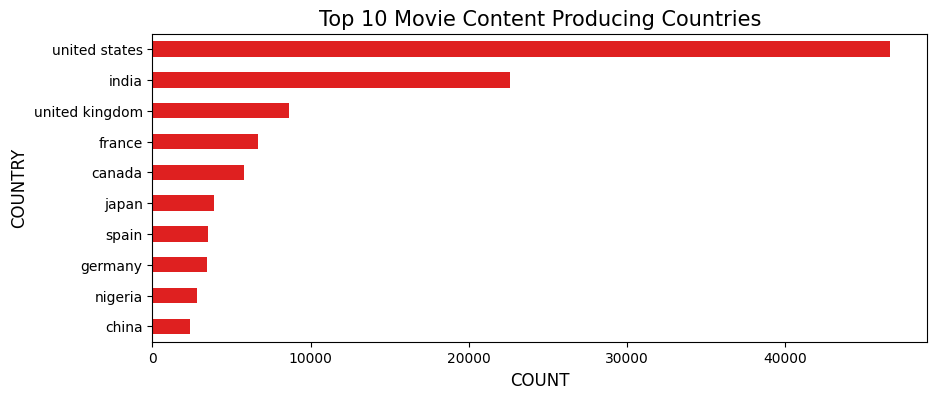

In [70]:
# Top 10 Movie Producing Countries : Countries which comes in top 10 in terms of Producing movies are [United States, India,Uk,France,Canada etc]
top_movies_countries = movies["country"].value_counts().reset_index().head(10)
plt.figure(figsize=(10,4))
plt.title('Top 10 Movie Content Producing Countries',fontsize=15)
plt.xlabel("COUNT",fontsize=12)
plt.ylabel("COUNTRY",fontsize=12)
sns.barplot(x='count', y='country',data=top_movies_countries,color="red",width=.5)
plt.show()

** FOR MOVIES :TOP 5 COUNTRIES WITH TOP 5 GENRE DISTRIBUTION**

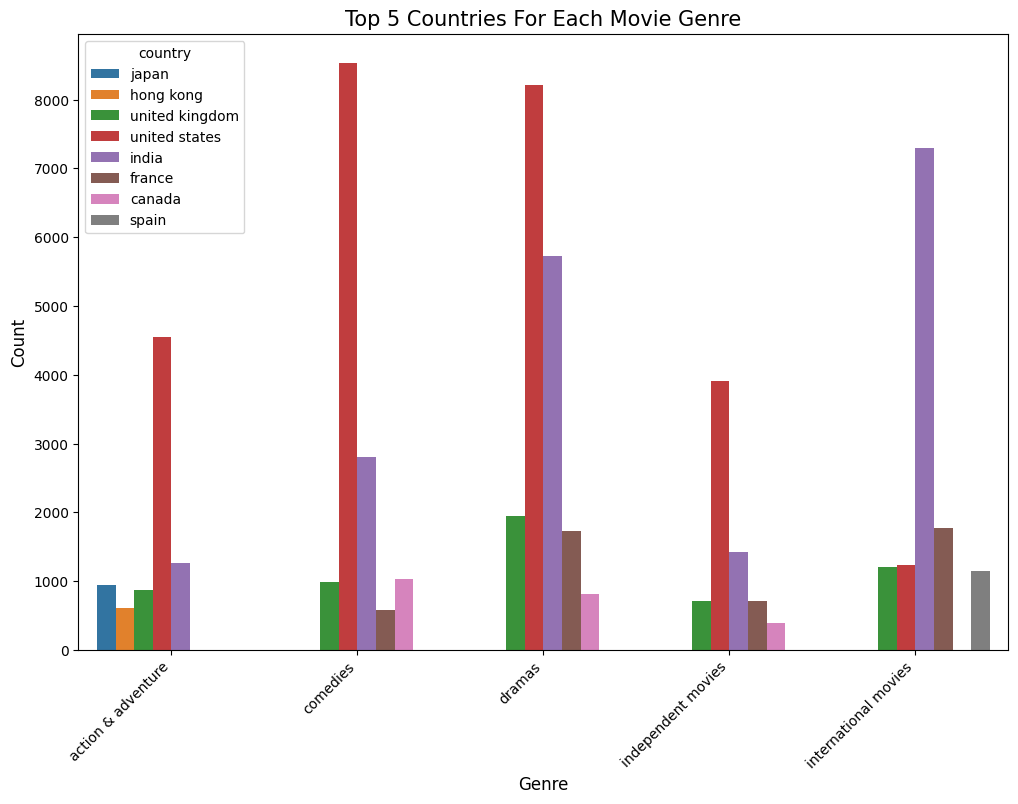

In [71]:
# Movies(Distribution of countries for each Genre) : Observing this output, we can say that for the top 5 Genres mostly movies produced in United States & India.
movies_top5genre=movies[movies["listed_in"].isin(movies_topgenre["listed_in"].head(5))].reset_index(drop=True)
movies_top5genre_country=movies_top5genre.groupby(["listed_in","country"])["title"].count().reset_index().sort_values(by="title",ascending=False)
movie_topcountry_genrewise=movies_top5genre_country.groupby("listed_in").head(5).sort_values(by="listed_in",ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(x="listed_in",y="title",hue="country",data=movie_topcountry_genrewise)
plt.title("Top 5 Countries For Each Movie Genre",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genre",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

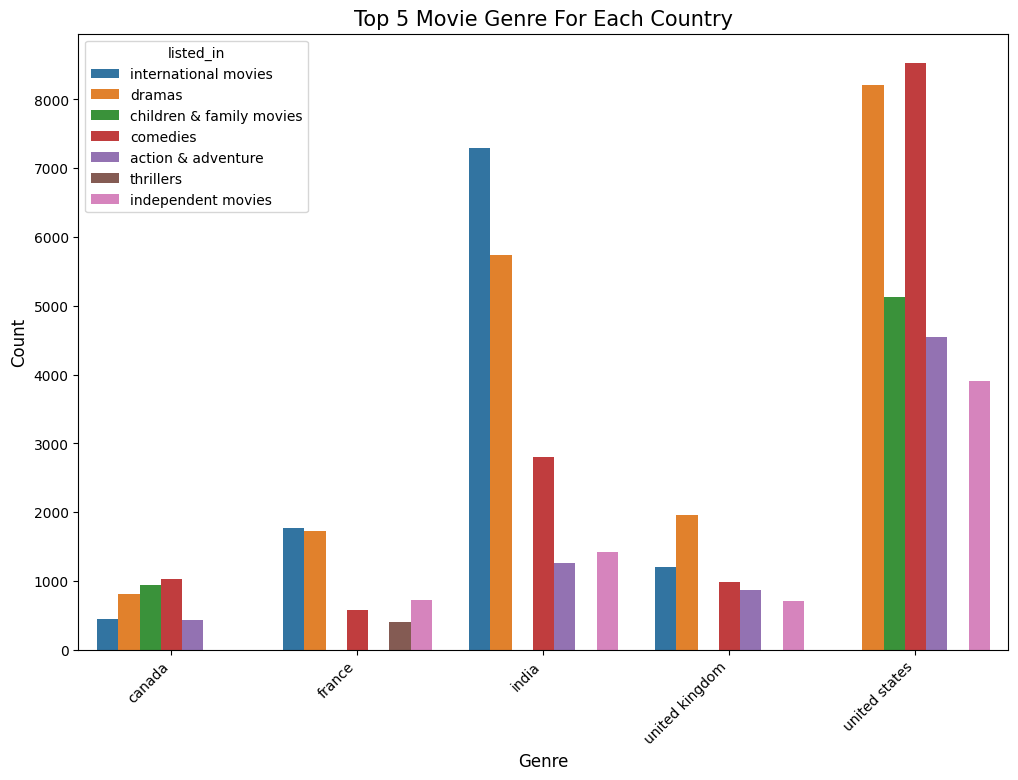

In [72]:
# Movies(Distribution of Genre for each countries) : Observing this output, we can see the most famous Movie Genres accross countries.
movies_top5country=movies[movies["country"].isin(top_movies_countries["country"].head(5))].reset_index(drop=True)
movies_top5country_genre=movies_top5country.groupby(["country","listed_in"])["title"].count().reset_index().sort_values(by="title",ascending=False)
movie_topgenre_countrywise=movies_top5country_genre.groupby("country").head(5).sort_values(by="country",ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(x="country",y="title",hue="listed_in",data=movie_topgenre_countrywise)
plt.title("Top 5 Movie Genre For Each Country",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genre",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

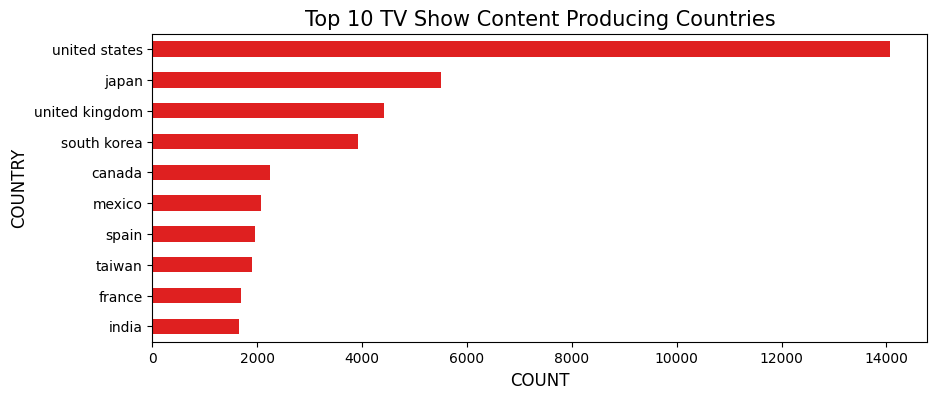

In [73]:
# Top 10 TV Shows Producing Countries : Countries which comes in top 10 in terms of Producing tv shows are [United States,Japan,United Kingdom etc]
top_countries =tv_shows[tv_shows["country"]!="Unknown Country"]["country"].value_counts().reset_index().head(10)
plt.figure(figsize=(10,4))
plt.title('Top 10 TV Show Content Producing Countries',fontsize=15)
plt.xlabel("COUNT",fontsize=12)
plt.ylabel("COUNTRY",fontsize=12)
sns.barplot(x='count',y='country',color="red",data=top_countries,width=.5)
plt.show()

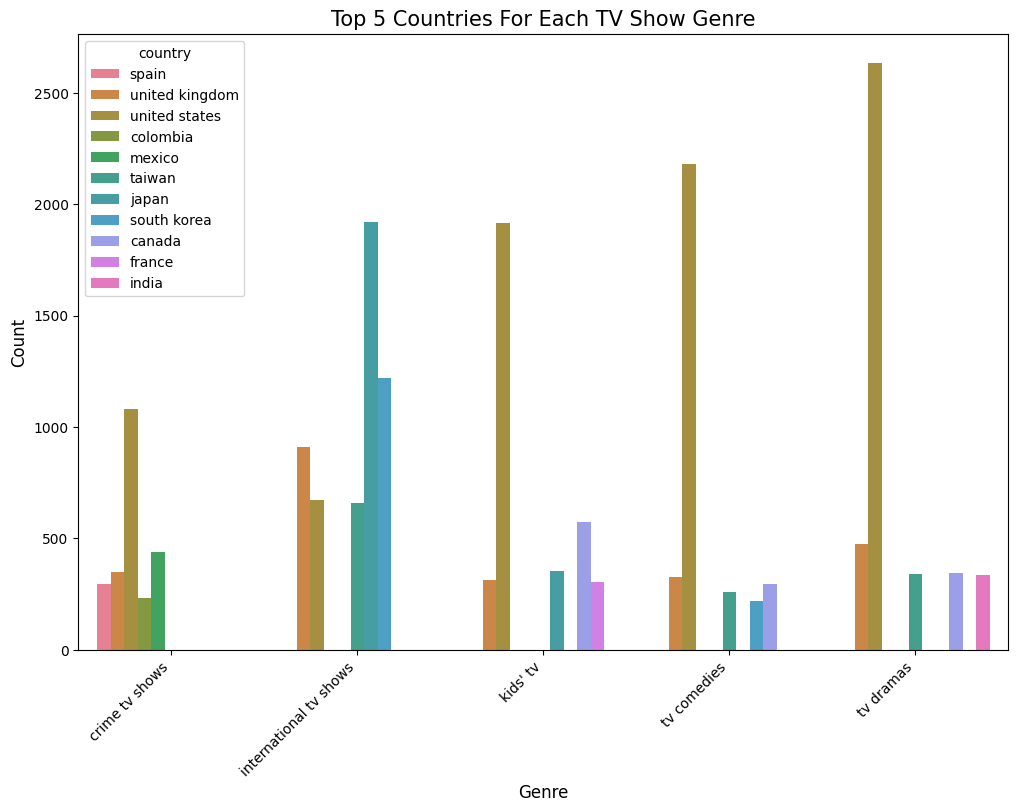

In [74]:
# TV Shows(Distribution of countries for each Genre) : Observing this output, we can say that for the top 5 Genres mostly tv shows produced.
tvshows_top5genre=tv_shows[tv_shows["listed_in"].isin(tvshows_topgenre["listed_in"].head(5))].reset_index(drop=True)
tvshows_top5genre_country=tvshows_top5genre[tvshows_top5genre["country"]!="Unknown Country"].groupby(["listed_in","country"])["title"].count().reset_index().sort_values(by="title",ascending=False)
tvshows_topcountry_genrewise=tvshows_top5genre_country.groupby("listed_in").head(5).sort_values(by="listed_in",ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(x="listed_in",y="title",hue="country",data=tvshows_topcountry_genrewise)
plt.title("Top 5 Countries For Each TV Show Genre",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genre",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

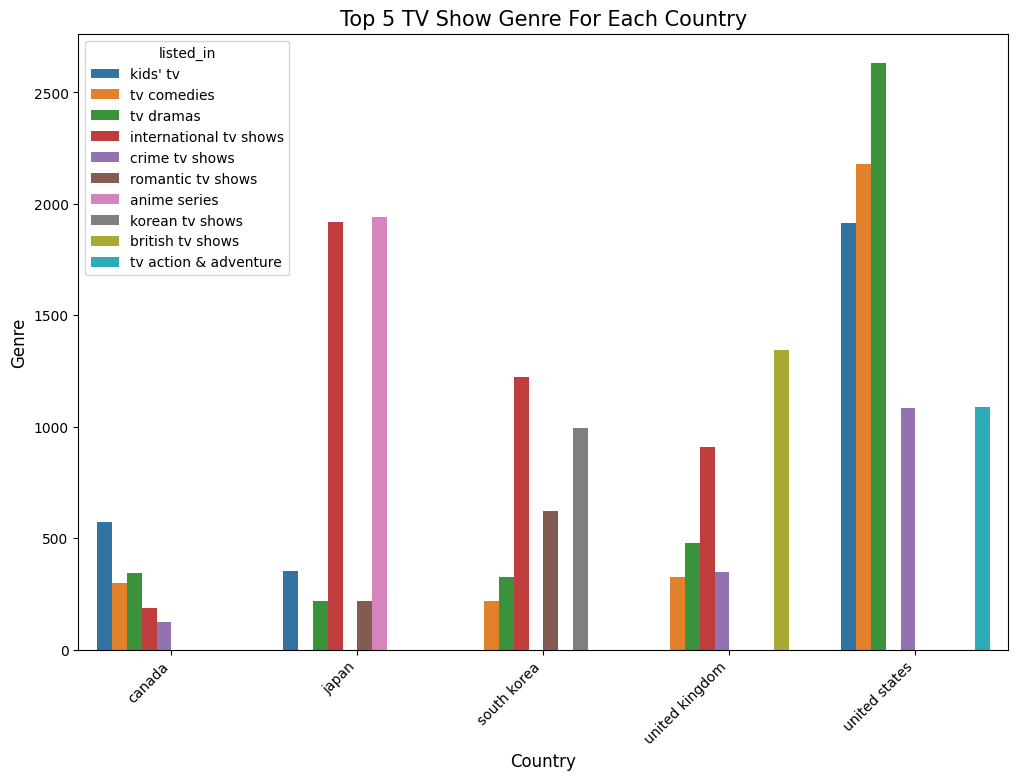

In [75]:
# TV Shows(Distribution of countries for each Genre) : Observing this output, we can say that for the top 5 Genres mostly tv shows produced in United States.
# TV Shows(Distribution of countries for each Genre) : Observing this output, we can see the most famous TV Shows accross countries.
tvshows_top5country=tv_shows[tv_shows["country"].isin(top_countries["country"].head(5))].reset_index(drop=True)
tvshows_top5genre_country=tvshows_top5country.groupby(["country","listed_in"])["title"].count().reset_index().sort_values(by="title",ascending=False)
tvshows_topgenre_countrywise=tvshows_top5genre_country.groupby("country").head(5).sort_values(by="country",ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(x="country",y="title",hue="listed_in",data=tvshows_topgenre_countrywise)
plt.title("Top 5 TV Show Genre For Each Country",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Country",fontsize=12)
plt.ylabel("Genre",fontsize=12)
plt.show()

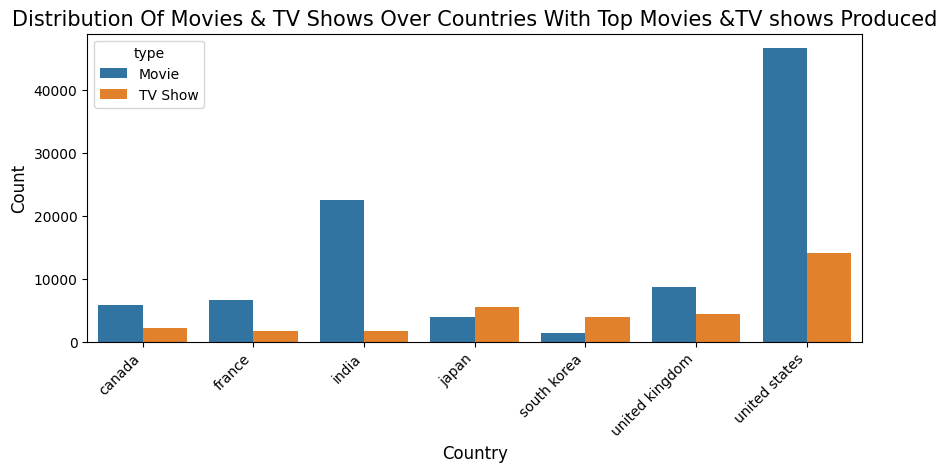

In [76]:
# Analyzing the distribution of movies/tv shows over country & genre we have seen that countries where movies are famous -
# [United States,Japan,United Kingdom,South Korea,Canada] & countries where TV Shows are famous-[US,India,UK,France,Canada]
# Now we shall take these countries & see the distribution of movies/tvshows accross these coutries--Seeing this chart it can be inferred that
# Countries like India & United States where movies are significantly higher than TV Shows , so in these type of countries Netflix can
# increase the content of TV Shows.
data_country=dy[dy["country"].isin(["united states","canada","japan","south korea","united kingdom","india","france"])].reset_index(drop=True)
data_country_type=data_country.groupby(["country","type"])["title"].count().reset_index()
plt.figure(figsize=(10,4))
plt.xlabel("Country",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Distribution Of Movies & TV Shows Over Countries With Top Movies &TV shows Produced",fontsize=15)
plt.xticks(rotation=45,ha="right")
sns.barplot(x="country",y="title",hue="type",data=data_country_type)
plt.show()

**DIRECTOR & CAST ANALYSIS**

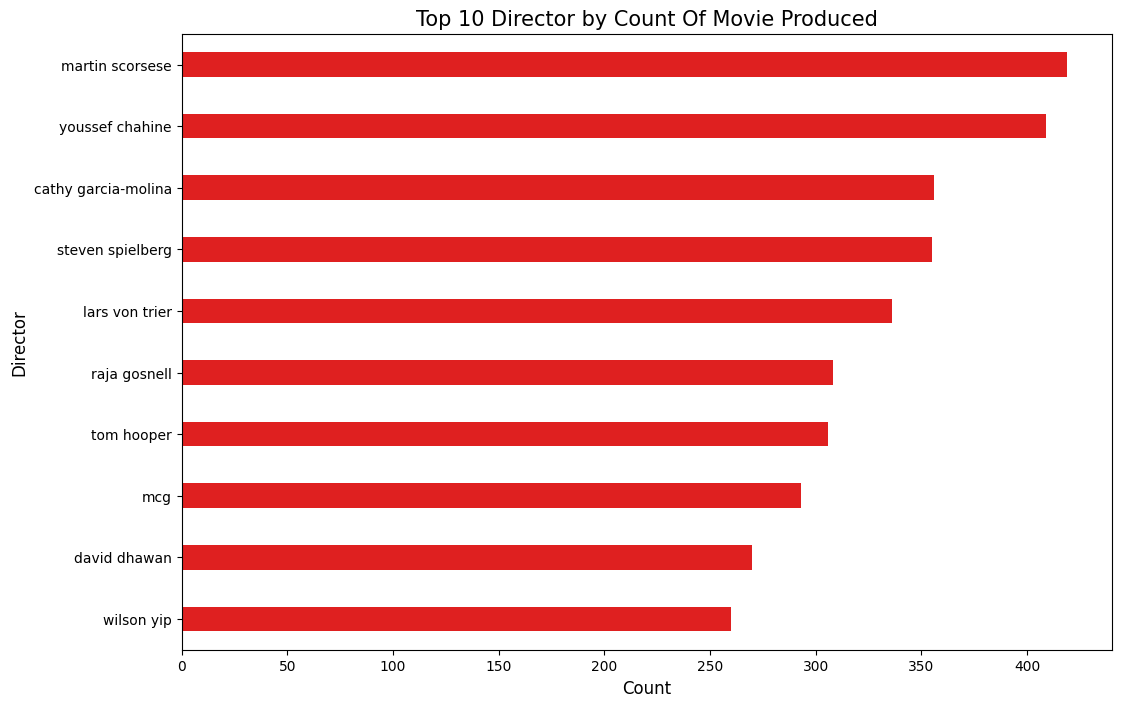

In [78]:
# MOVIE DIRECTORS : top 10 directors in terms of number of movie produced .These are the directors who have done most number of movies in the time range from 2942 to 2021.
movies_topdirector=movies[movies["director"]!="Unknown Director"]["director"].value_counts().reset_index().head(10)
plt.figure(figsize=(12,8))
plt.title("Top 10 Director by Count Of Movie Produced",fontsize=15)
sns.barplot(data=movies_topdirector,y="director",x="count",color="red",width=.4)

plt.ylabel("Director",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.show()

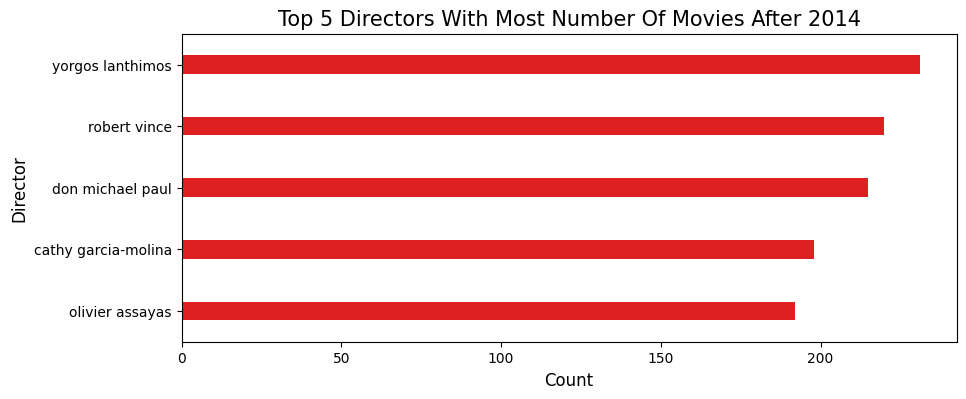

In [79]:
# Recent Director(Considering directors as recent director who have done most no of movies from 2015 to 2021) : From the chart we can conclude that
# these are the directors who have done most numbetr of movies within a timespan of 2015 to 2021 or we can say they are the current director.
recent_director=movies[(movies["release_year"]>2014) & (movies["director"]!="Unknown Director")]["director"].value_counts().reset_index().head(5)
plt.figure(figsize=(10,4))
plt.title("Top 5 Directors With Most Number Of Movies After 2014",fontsize=15)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Director",fontsize=12)
sns.barplot(data=recent_director,x="count",y="director",color="red",width=.3)
plt.show()

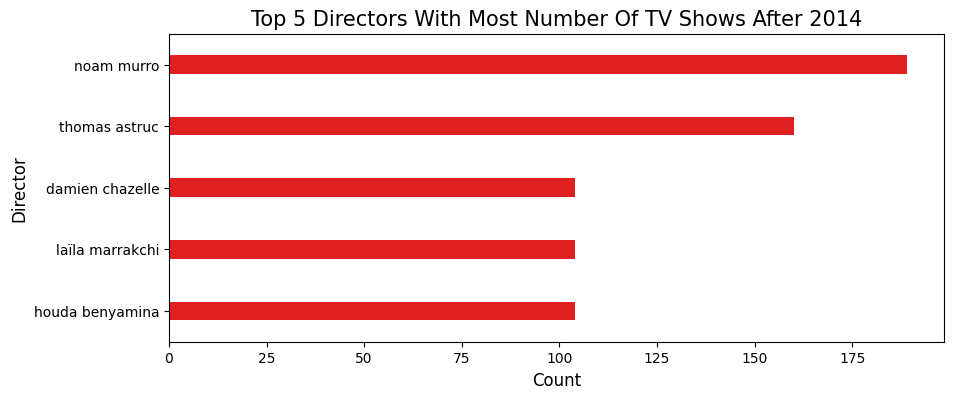

In [81]:
# Recent Director(Considering directors as recent director who have done most no of TV Shows from 2015 to 2021) : From the chart we can conclude that
# these are the directors who have done most number of tv shows within a timespan of 2015 to 2021 or we can say they are the current director.
recent_director=tv_shows[(tv_shows["release_year"]>2014) & (tv_shows["director"]!="Unknown Director")]["director"].value_counts().reset_index().head(5)
plt.figure(figsize=(10,4))
plt.title("Top 5 Directors With Most Number Of TV Shows After 2014",fontsize=15)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Director",fontsize=12)
sns.barplot(data=recent_director,x="count",y="director",color="red",width=.3)
plt.show()

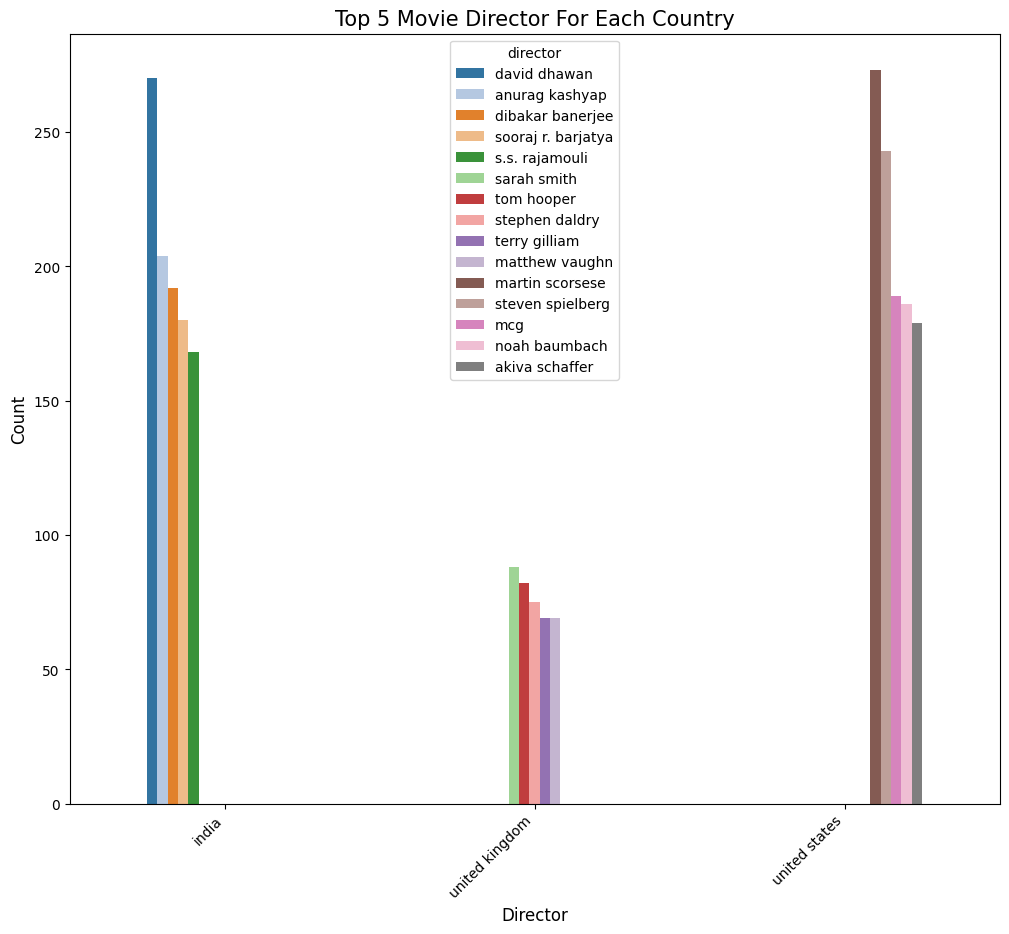

In [82]:
# DIstribution of Director over Top 3 Country based on Number of Movie Production:
movies_top5countrydirector=movies[movies["country"].isin(top_movies_countries["country"].head(3))].reset_index(drop=True)
movies_top5country_director=movies_top5countrydirector[movies_top5countrydirector["director"]!="Unknown Director"].groupby(["country","director"])["title"].count().reset_index().sort_values(by="title",ascending=False)
movie_topdirector_countrywise=movies_top5country_director.groupby("country").head(5).sort_values(by="country",ascending=True)
plt.figure(figsize=(12,10))
palette = sns.color_palette("tab20", len(movie_topdirector_countrywise["director"].unique()))
sns.barplot(x="country",y="title",hue="director",data=movie_topdirector_countrywise,width=.5,palette=palette)
plt.title("Top 5 Movie Director For Each Country",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()


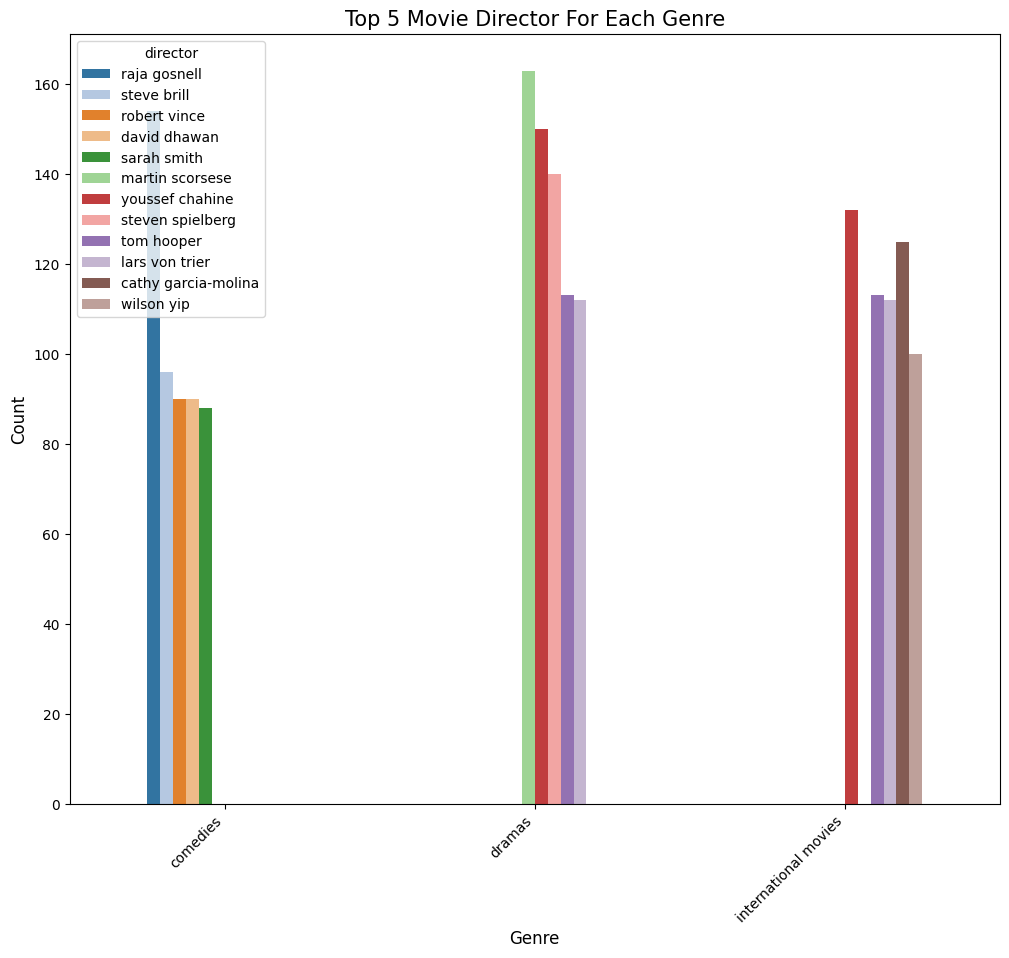

In [83]:
# DIstribution of Director over Top 3 Genre based on Number of Movie Production:
movies_top5genredirector=movies[movies["listed_in"].isin(movies_topgenre["listed_in"].head(3))].reset_index(drop=True)
movies_top5genre_director=movies_top5genredirector[movies_top5genredirector["director"]!="Unknown Director"].groupby(["listed_in","director"])["title"].count().reset_index().sort_values(by="title",ascending=False)
movie_topdirector_genrewise=movies_top5genre_director.groupby("listed_in").head(5).sort_values(by="listed_in",ascending=True)
plt.figure(figsize=(12,10))
palette = sns.color_palette("tab20", len(movie_topdirector_genrewise["director"].unique()))
sns.barplot(x="listed_in",y="title",hue="director",data=movie_topdirector_genrewise,width=.5,palette=palette)
plt.title("Top 5 Movie Director For Each Genre",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genre",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

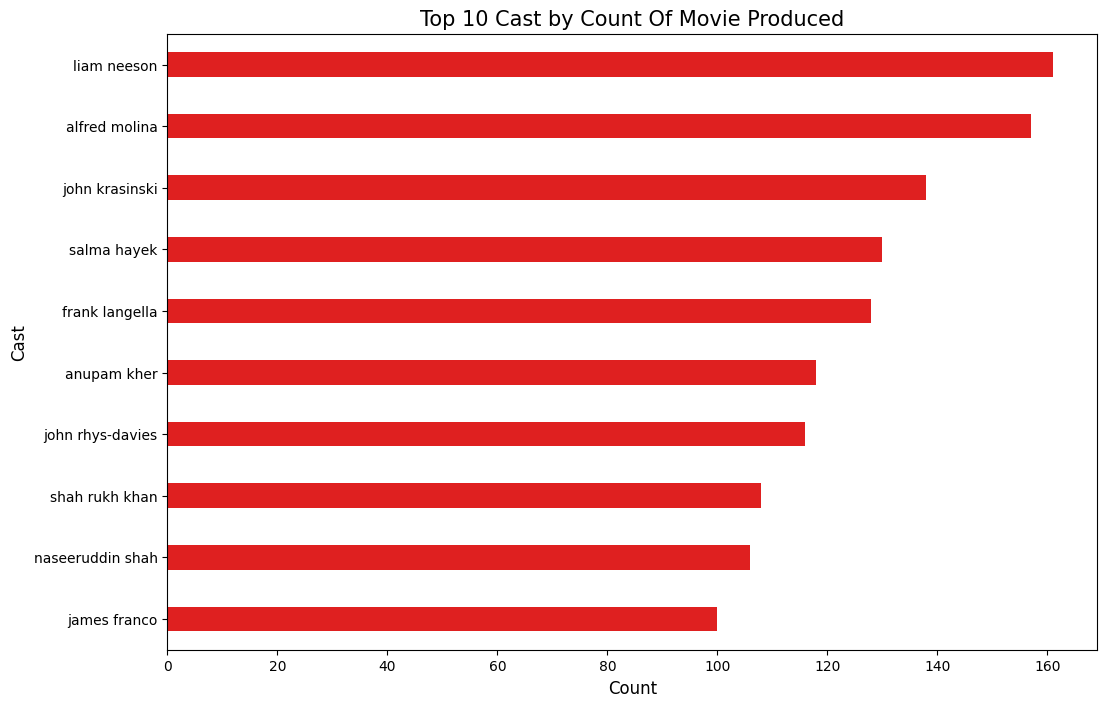

In [84]:
# MOVIE CAST : top 10 casts in terms of number of movie produced .
movies_topcast=movies[movies["cast"]!="Unknown Cast"]["cast"].value_counts().reset_index().head(10)
plt.figure(figsize=(12,8))
plt.title("Top 10 Cast by Count Of Movie Produced",fontsize=15)
sns.barplot(data=movies_topcast,y="cast",x="count",color="red",width=.4)
plt.ylabel("Cast",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.show()

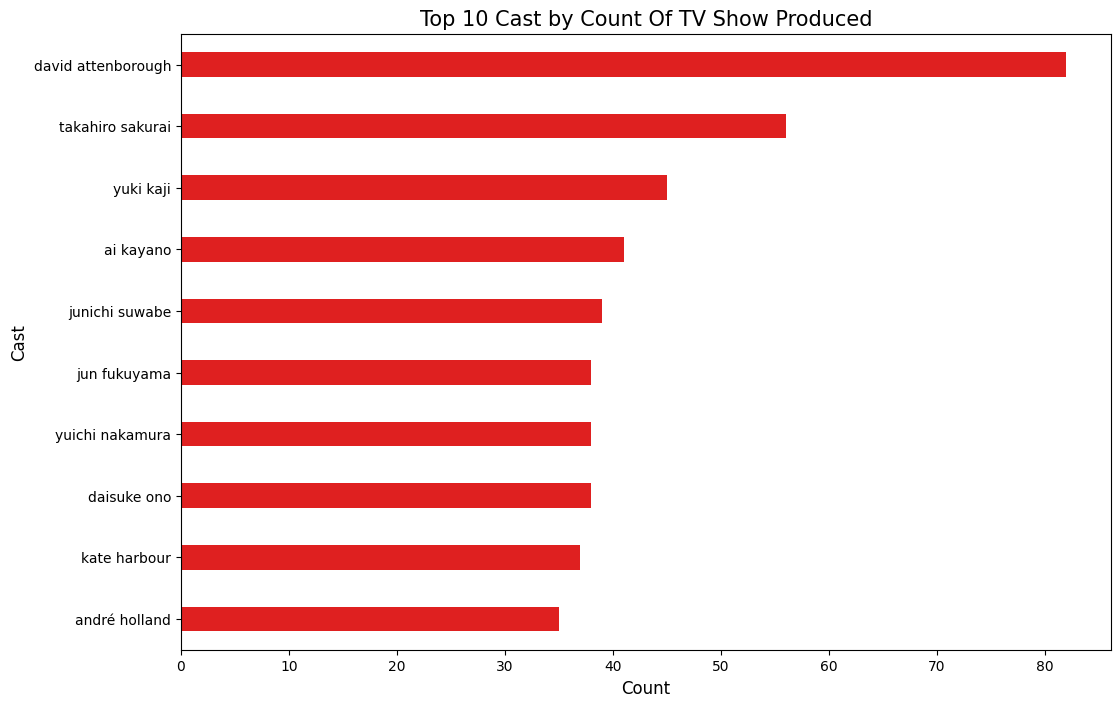

In [85]:
# TV SHOWS CASTS : top 10 casts in terms of number of tv shows produced .
tvshows_topcast=tv_shows[tv_shows["cast"]!="Unknown Cast"]["cast"].value_counts().reset_index().head(10)
plt.figure(figsize=(12,8))
plt.title("Top 10 Cast by Count Of TV Show Produced",fontsize=15)
sns.barplot(data=tvshows_topcast,y="cast",x="count",color="red",width=.4)
plt.ylabel("Cast",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.show()

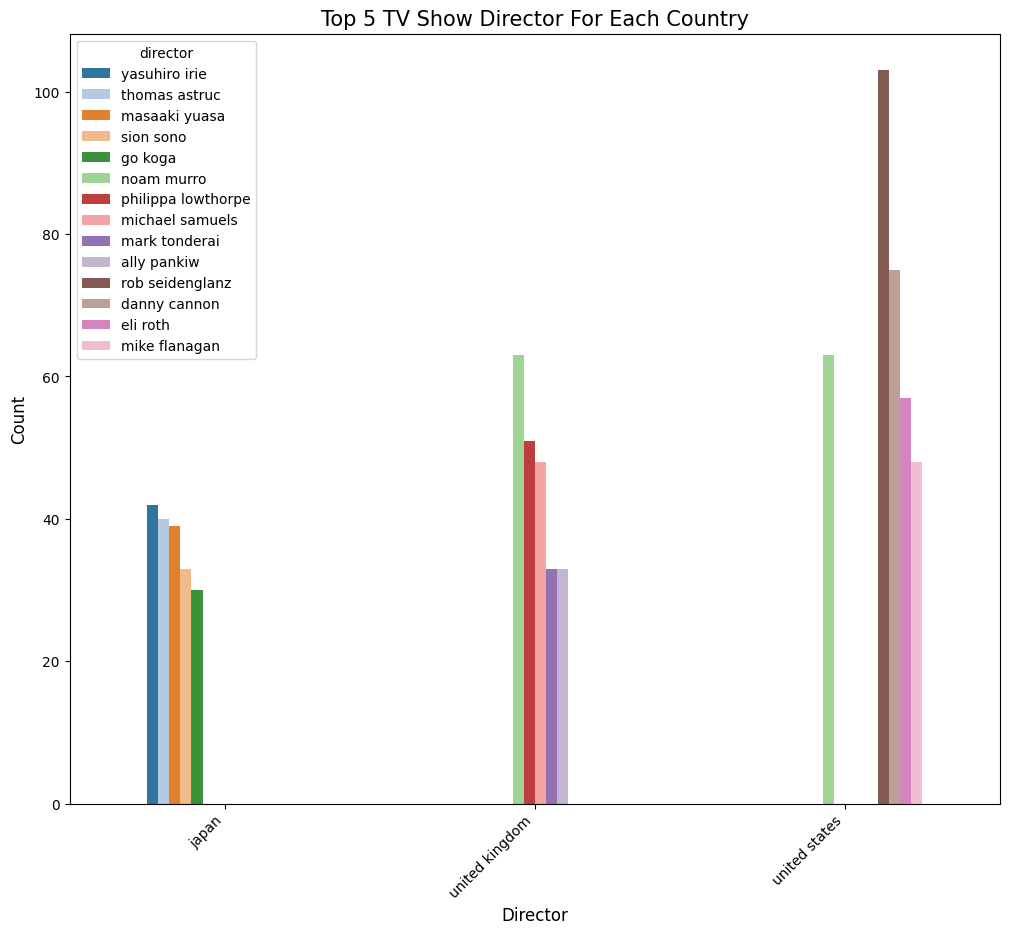

In [86]:
# DIstribution of Director over Top 3 Country based on Number of TV Show Production:
tvshows_top5countrydirector=tv_shows[tv_shows["country"].isin(top_countries["country"].head(3))].reset_index(drop=True)
tvshows_top5country_director=tvshows_top5countrydirector[tvshows_top5countrydirector["director"]!="Unknown Director"].groupby(["country","director"])["title"].count().reset_index().sort_values(by="title",ascending=False)
tvshows_topdirector_countrywise=tvshows_top5country_director.groupby("country").head(5).sort_values(by="country",ascending=True)
plt.figure(figsize=(12,10))
palette = sns.color_palette("tab20", len(tvshows_topdirector_countrywise["director"].unique()))
sns.barplot(x="country",y="title",hue="director",data=tvshows_topdirector_countrywise,width=.5,palette=palette)
plt.title("Top 5 TV Show Director For Each Country",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

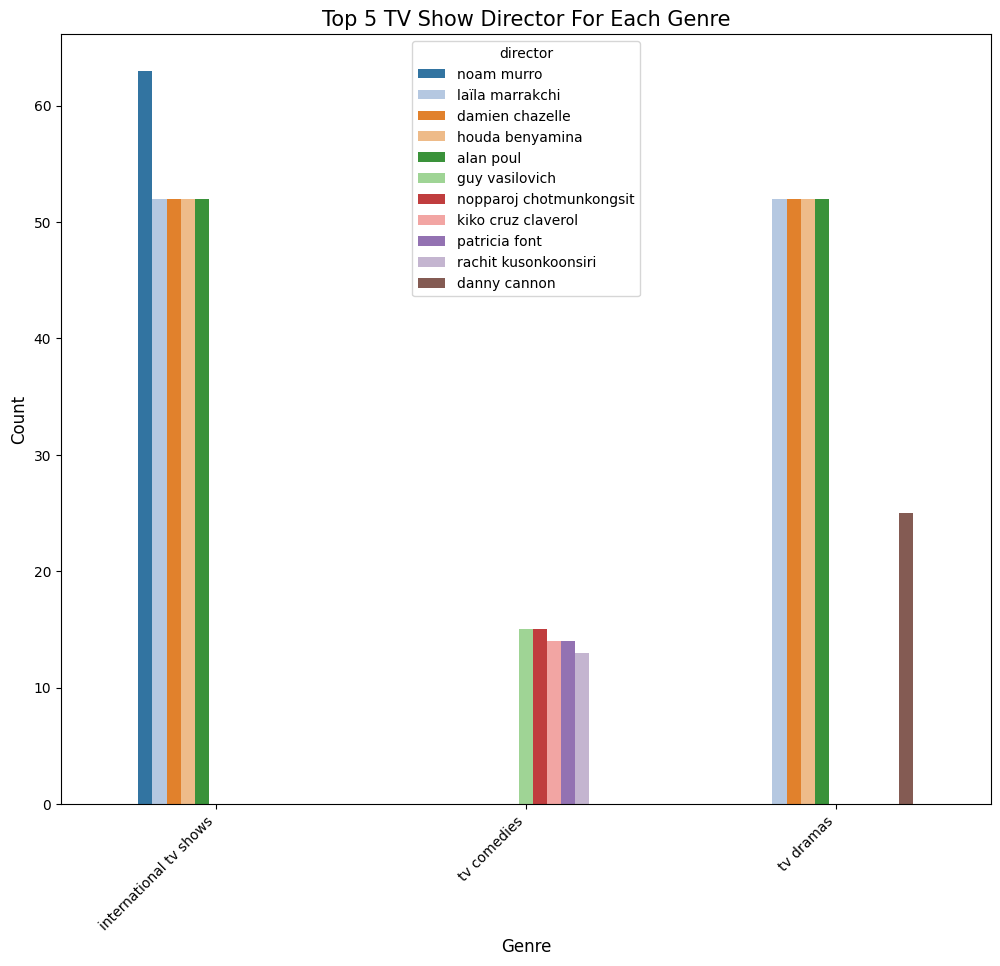

In [87]:
# DIstribution of Director over Top 3 Genre based on Number of TV SHow Production:
tvshows_top5genredirector=tv_shows[tv_shows["listed_in"].isin(tvshows_topgenre["listed_in"].head(3))].reset_index(drop=True)
tvshows_top5genre_director=tvshows_top5genredirector[tvshows_top5genredirector["director"]!="Unknown Director"].groupby(["listed_in","director"])["title"].count().reset_index().sort_values(by="title",ascending=False)
tvshows_topdirector_genrewise=tvshows_top5genre_director.groupby("listed_in").head(5).sort_values(by="listed_in",ascending=True)
plt.figure(figsize=(12,10))
palette = sns.color_palette("tab20", len(tvshows_topdirector_genrewise["director"].unique()))
sns.barplot(x="listed_in",y="title",hue="director",data=tvshows_topdirector_genrewise,width=.5,palette=palette)
plt.title("Top 5 TV Show Director For Each Genre",fontsize=15)
plt.xticks(rotation=45,ha="right")
plt.xlabel("Genre",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

**Director Cast Analysis**:

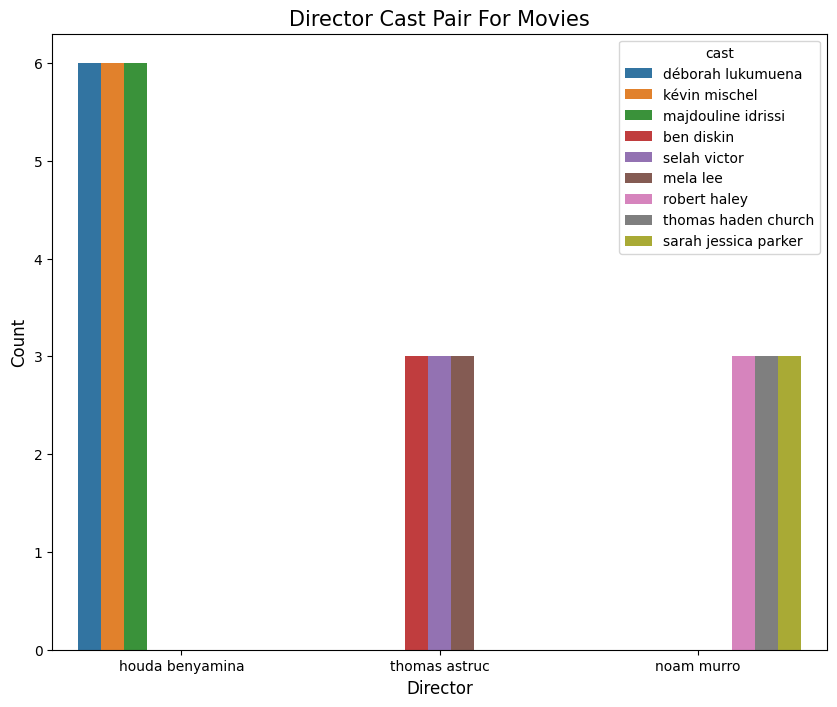

In [114]:
# Movies DIrector Cast Pair: Here we can see the top director cast pair.
movies_director_cast=movies[movies["director"].isin(recent_director["director"])].groupby(["director", "cast"])["title"].count().reset_index()
movies_director_cast_top=movies_director_cast.sort_values(by="title",ascending=False).reset_index(drop=True)
top_movies_director_cast=movies_director_cast_top.groupby("director").head(3).reset_index(drop=True)
plt.figure(figsize=(10,8))
plt.title("Director Cast Pair For Movies",fontsize=15)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.barplot(x="director",y="title",hue="cast",data=top_movies_director_cast)
plt.show()

**TREND IN RATINGS OVER TIME**

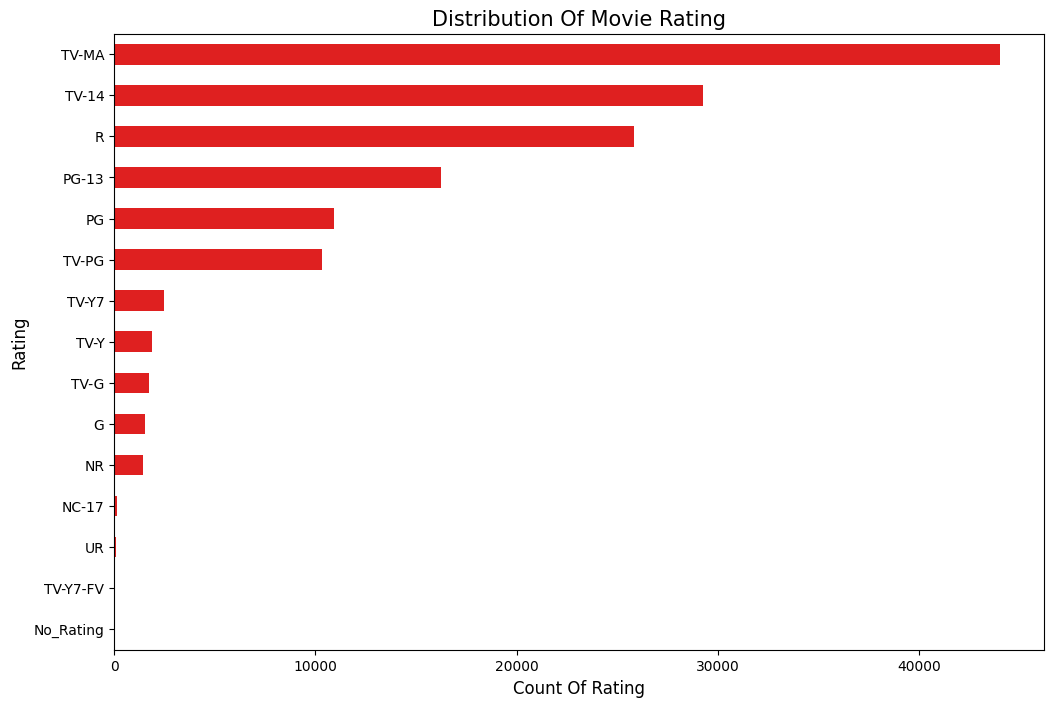

In [88]:
# MOVIES-Rating Distribution : From this chart it can be noticed that most of the movies in Netflix are TV-MA rated mean
# they are intended for mature audiences and may not be suitable for children under 17.
movies_toprating=movies["rating"].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.title("Distribution Of Movie Rating",fontsize=15)
plt.xlabel("Count Of Rating",fontsize=12)
plt.ylabel("Rating",fontsize=12)
sns.barplot(data=movies_toprating,y="rating",x="count",color="red",width=.5)
plt.show()

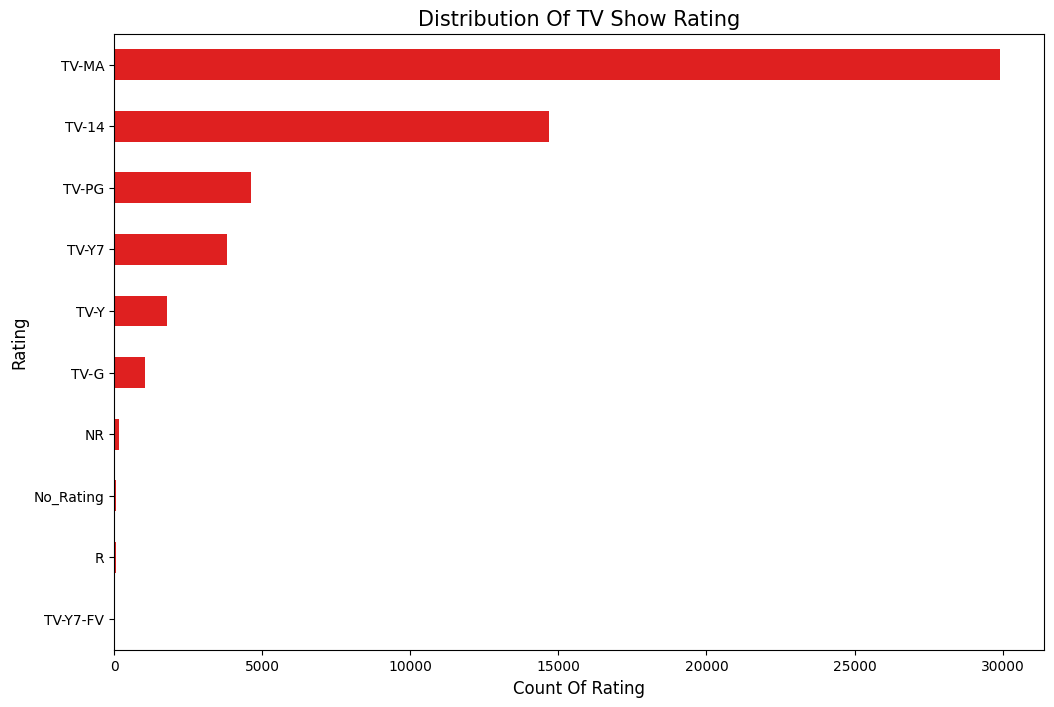

In [89]:
# TV SHOWS-Rating Distribution : From this chart it can be noticed that most of the tv shows in Netflix are TV-MA rated mean
# they are intended for mature audiences and may not be suitable for children under 17.
tvshows_toprating=tv_shows["rating"].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.title("Distribution Of TV Show Rating",fontsize=15)
plt.xlabel("Count Of Rating",fontsize=12)
plt.ylabel("Rating",fontsize=12)
sns.barplot(data=tvshows_toprating,y="rating",x="count",color="red",width=.5)
plt.show()

**ANALYZING RATING**

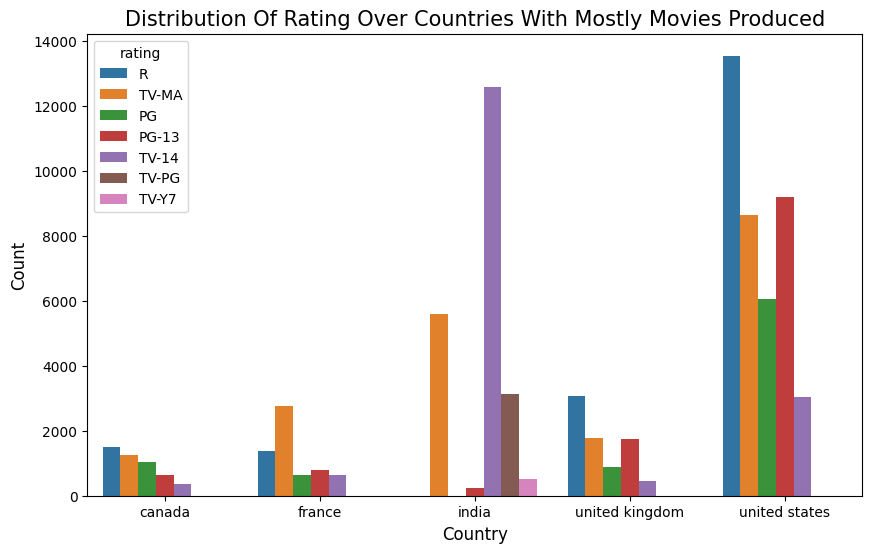

In [90]:
# Movies(Considering the top5 countries with highest number of movies , we will the distribution of rating) : From the below chart we can infer that
# Mostly movies produced in United States are "R" rating that is  it's restricted and that children under 17 must be accompanied by a parent or adult guardian to see it.
# For UK it is also "R",  For India it is "TV-14" that  is deemed appropriate for teens aged 14 and up.
# But for France it is "TV-MA" that  is intended for mature audiences. So these inferences will help to understand the target audiences.
movie_rating=movies[movies["country"].isin(top_movies_countries["country"].head(5))].reset_index(drop=True)
movies_rating_countrywise=movie_rating.groupby(["country","rating"])["title"].count().reset_index().sort_values(by="title",ascending=False).reset_index(drop=True)
movies_rating_countrywise_rating=movies_rating_countrywise.groupby("country").head(5).sort_values(by=["country","title"],ascending=[True,False]).reset_index(drop=True)
plt.figure(figsize=(10,6))
plt.title("Distribution Of Rating Over Countries With Mostly Movies Produced",fontsize=15)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Count",fontsize=12)
sns.barplot(x="country",y="title",hue="rating",data=movies_rating_countrywise_rating)
plt.show()

**OBSERVATIONS**

**After Analyzing the Netflix Data we come to following conclusions :**



*   **Duration**: Mostly movies fall under 80-120 mins & TV Shows under 1 season duration. So this duration range will be highly beneficial for future content duration selection.
*   **Time** :

  1.   Netflix started increasing to add movies & TV Shows significantly after 2010 but there also a strong dip can be seen after 2019 due to Covid.
  2.   Considering Month : It is seen that mostly movies added on January,April,June-August,October,November-December month & mostly TV Shows added on January,April,May-August,November-December month due to various festivals accross regions .
  3.    Considering Week : It is seen that mostly movies & TV Shows added on 1st & 3rd week .
  4.    Considering day of the week: It is seen that mostly movies & TV Shows added on Friday.

*   **Popular Genres**:
  1.   Movies: Top 5 Genres on mostly Movies made are - ["dramas","international movies","comedies","action&adventure","independent movies"].
  2.   TV Shows: Top 5 Genres on mostly TV Shows made are - ["international tv shows","dramas",,"comedies","crime","kid's tv shows"].
*   **Popular Countries**:
  1.   Movies: Top 5 Countries where mostly Movies made are - [United States,India,United Kingdom,France,Canada].
  2.   TV Shows: Top 5 Genres where mostly TV Shows made are - [United States,Japan,United Kingdom,South Korea,Canada].

*  **Distribution of Countries on Top 5 Genre**:
  1.   Movies: United state & India are the top two countries where ["dramas","comedies","action&adventure","independent movies"]-this genres are mostly popular ,but India & France are the top two countries where "international movies" is mostly popular.
  2.   TV Shows: United state is highly popular in the category of Genre of [Kid's Tv, Comedy & Drama & Crime] but Japan & South Korea are highly popular in "international Tv shows"

*   **Distribution of Genres on Top 5 Countries**:
  1.   Movies: Dramas & Comedis are mostly popular in United State,where drama & international movies are mostly popular in India also in france.
  2.   TV Shows: Drama,Comedies & Kid's Tv are highly popular in United States,
  where international tv shows highly popular in UK,South Korea & Japan,
  anime series are mostly popular in Japan,korean tv serial eventually famous in South Koerea

*   **Insights on Movies/TV Shows**
   1.   We have seen that there are 72.21% movies & 27.79% TV Shows are in Netflix. after analyzing the data we have seen that some countries having more number of movies compared to tv shows on the otherhand for some countries it is just opposite.
   If we consider the top5 country for tv show/movies then -
   US,UK,India,France & Canada where movies produced more than the TV Shows but Countries like Japan,South Korea TV Shows are more popular than movies.
*  **Rating**: If we consider top 5 rating then we can observe that mostly movies in Netflix having rating [TV-MA,TV-14,TV-R.TV-13,PG] & for TV Shows they are [TV-MA,TV-14,PG,TV-Y7,TV-Y]--------For both Movies & TV Shows it can be said that mostly the target audiences are under "Matured" audiences.


*   **Popular Directors**:

     Movie: [martin scorsese,youssef chahine,cathy garcia-molina,steven spielberg,lars von trier]- These are the most popular director in Movies type of all time.But if we consider time range from 2015 to 2021 then the most popular directors will be [yorgos lanthimos,robert vince,don michael paul,cathy garcia molina,olivier assayas]-----Here we can see that
     **"cathy garcia-molina"** is the director who is common among the two, it means he is consistent.
*   TV SHows: If we consider time range from 2015 to 2021 then the most popular directors in TV SHows will be[noam murro,thomas astruc,houda benyamina,alan poul,laila marrakchi].



















